In [15]:
#import needed library
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.random import set_seed
import keras
import io
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
# upload your dataset to google colab
uploaded = files.upload()

Saving BTCUSD_D.csv to BTCUSD_D.csv


In [5]:
#read uploded data as df
df=pd.read_csv(io.BytesIO(uploaded['BTCUSD_D.csv']))

In [6]:
#drop unnecessary columns from your dataset
data=df.drop(columns=['time', 'low','high','tick_volume','close'])

In [7]:
# Preprocess the data and normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.values)

In [10]:
# Create input and output sequences (in this section you will make X and Y matrixs as input and Labels)
sequence_length = 8
X = []
y = []
for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])
    y.append(data[i])
X = np.array(X)
y = np.array(y)

In [11]:
# Split the data into training and testing sets
split_ratio = 0.95
split_index = int(split_ratio * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

In [13]:
# to stable your model output we can use set seed
tf.random.set_seed(20)

In [19]:
# Define the LSTM model as a sequential model and add single layer containing 50 neurons and determine input shape of data and Using drop out to prevent of overfitting
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# train defined model with train data with 100 epochs
model.fit(X_train, y_train, epochs=100, batch_size=32)

In [31]:
#getting model prediction
predicted_data = scaler.inverse_transform(model.predict(X_test))

5/5 [==============================] - 0s 3ms/step


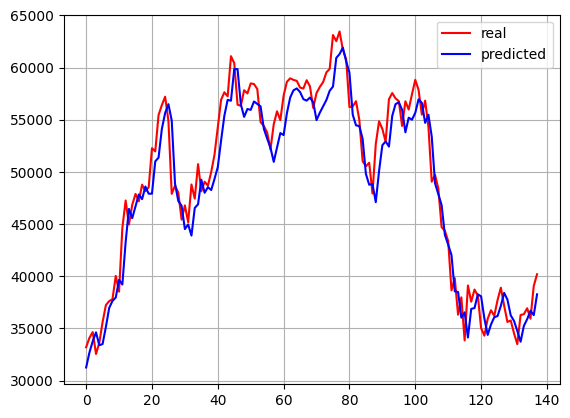

In [32]:
plt.plot(scaler.inverse_transform(y_test),'r', label='real')
plt.plot(predicted_data,'b',label='predicted')
plt.legend()
plt.grid()
plt.show()